In [6]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from utils import sigmoid, gradient_descent
import time
from scipy.sparse import rand

In [7]:
# Creating random events with some density over an n by m grid.
n = 5
m = 10
x = rand(n, m, density=0.2, format='csr')
x.data[:] = 1
X = x.toarray().flatten()

In [8]:
# Initialising the true parameter vector.
true_theta = np.random.randn(n*m,n*m)
y = np.zeros(n*m)
for i in range(n*m):
    true_theta[i] = true_theta[i]/np.sum(true_theta[i])
    y[i] = sigmoid(np.dot(X.T, true_theta[i]))

/home/im2ag/Desktop/M1/Internship/ljk-dao-internship/utils.py:165: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(pred) - (1 - y) * np.log(1 - pred)).mean()


Iterations: 500 , time: 0.246901273727417 .


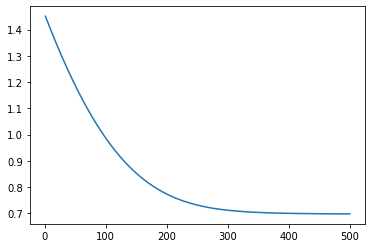

In [9]:
# Gradient Descent.
np.random.seed(42)
start_time = time.time()
theta_init = np.random.randn(n*m,n*m)
for i in range(n):
    theta_init[i] = theta_init[i]/np.sum(theta_init[i])
theta, i, log_err = gradient_descent(X, y, n*m, theta_init, 0.02, max_error=0.5, max_iterations=500)
print("Iterations:", i, ", time:", (time.time() - start_time), ".")
plt.plot(log_err, label="Log loss function")

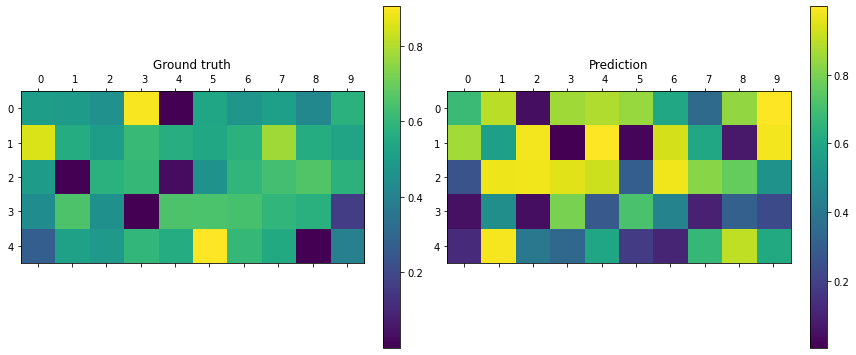

In [13]:
prediction = sigmoid(np.dot(X.T, theta))
# Basic Configuration
fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
ax1, ax2 = axes
im1 = ax1.matshow(y.reshape((n, m)))
im2 = ax2.matshow(prediction.reshape((n, m)))

# Formatting for heat map 1.
ax1.set_xticks(range(m))
ax1.set_yticks(range(n))
ax1.set_title("Ground truth")
plt.setp(ax1.get_xticklabels(), rotation=0, ha='left', rotation_mode='anchor')
plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

# Formatting for heat map 2.
ax2.set_xticks(range(m))
ax2.set_yticks(range(n))
ax2.set_title("Prediction")
plt.setp(ax2.get_xticklabels(), rotation=0, ha='left', rotation_mode='anchor')
plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

fig.tight_layout()